2024-08-02 02:13:01.125093: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 02:13:01.130139: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 02:13:01.141041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 02:13:01.163628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 02:13:01.169084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-02 02:13:01.187721: I tensorflow/core/platform/cpu_feature_gu

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7957)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       795,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801,552 (3.06 MB)

 Trainable params: 801,252 (3.06 MB)

 Non-trainable params: 300 (1.17 KB)

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4802 - loss: 2.9548 - val_accuracy: 0.7803 - val_loss: 1.6908 - learning_rate: 0.0010
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6387 - loss: 1.5633 - val_accuracy: 0.7955 - val_loss: 1.5554 - learning_rate: 0.0010
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6771 - loss: 1.4024 - val_accuracy: 0.7955 - val_loss: 1.5086 - learning_rate: 0.0010
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7182 - loss: 1.2600 - val_accuracy: 0.7955 - val_loss: 1.4496 - learning_rate: 0.0010
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7720 - loss: 1.2199 - val_accuracy: 0.7955 - val_loss: 1.3975 - learning_rate: 0.0010
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7817 - loss: 1.1701 - val_accuracy: 0.7955 - val_loss: 1.3465 - learning_rate: 0.0010
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8773 - loss: 1.0371 - val_accuracy:

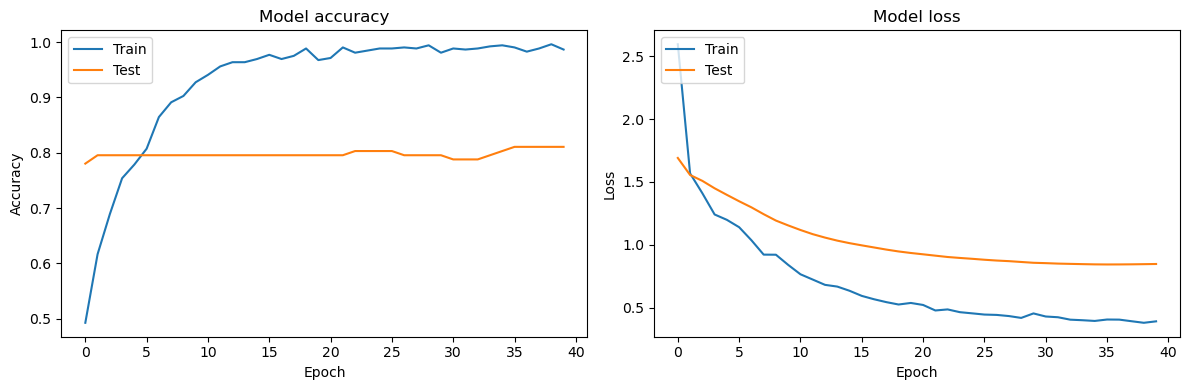

In [1]:
import pandas as pd
df = pd.read_csv('data_preprocessing_clean.csv')

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(df['stemmed_text']).toarray()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Pembagian data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menghitung class weights untuk menangani imbalance data
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['label']), y=df['label'])
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Ukuran vocab dari TF-IDF dan panjang maksimal input
vocab_size = X.shape[1]
embedding_dim = 128

# Number of classes
num_classes = len(np.unique(y))

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Masukkan dan lapisan pertama dengan regularisasi L2
inputs = layers.Input(shape=(vocab_size,))
x = layers.Dense(100, kernel_regularizer=regularizers.l2(0.01))(inputs)  # Adjusted units and regularizer
x = layers.LeakyReLU(alpha=0.01)(x)
x = layers.Dropout(0.5)(x)  # Adjusted dropout rate
x = layers.BatchNormalization()(x)  # Adding Batch Normalization

# Lapisan kedua
x = layers.Dense(50, kernel_regularizer=regularizers.l2(0.01))(x)  # Adjusted units and regularizer
x = layers.LeakyReLU(alpha=0.01)(x)
x = layers.Dropout(0.5)(x)  # Adjusted dropout rate
x = layers.BatchNormalization()(x)  # Adding Batch Normalization
# Lapisan keluaran
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Mengompilasi model
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),  # Adjusted learning rate
              metrics=['accuracy'])

# Callback untuk Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Summary model
model.summary()

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return (lr * tf.math.exp(-0.1)).numpy().item()
    
lr_scheduler = LearningRateScheduler(scheduler)

# Include this callback in your model training
history = model.fit(
    X_train, y_train, 
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test), 
    class_weight=class_weights, 
    callbacks=[early_stopping, lr_scheduler]
)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()